In [7]:
import pandas as pd
from seaborn import xkcd_palette
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [4]:
# Read the scaled data
data = pd.read_csv("D:\\Data analysis\\Data-Analysis-2024\\Project\\Data\\scaled_flood_drivers_dataset.csv")

# Define categories and their columns
categories = {
    "Labels": [col for col in data.columns if col.startswith('L')],
    "Topography": [col for col in data.columns if col.startswith('T')],
    "Hydrological": [col for col in data.columns if col.startswith('H')],
    "Vegetation": [col for col in data.columns if col.startswith('V')],
    "Shape": [col for col in data.columns if col.startswith('S')],
    "Climate": [col for col in data.columns if col.startswith('C')]
}



### Neural Network

In [5]:
# Separate rows where all labels are zero
test_df = data[data[categories["Labels"]].sum(axis=1) == 0]

# Separate rows where at least one label is non-zero
main_df = data[data[categories["Labels"]].sum(axis=1) != 0].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Preview the resulting DataFrames
print("Rows with all labels equal to zero (test_df):")
print(test_df.head())

print("\nRows with at least one non-zero label (main_df):")
print(main_df.head())


Rows with all labels equal to zero (test_df):
      L1   L2   L3   L4   L5   L6   L7   L8   L9  L10  ...        C2  \
352  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
353  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.004902   
354  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.049020   
355  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.009804   
357  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.053922   

           H2        H3        H4        H5        T5        H9       H10  \
352  0.818760  0.697173  1.000000  0.005022  0.006367  0.428588  0.813953   
353  0.871590  0.404917  0.846802  0.002372  0.007792  0.507090  0.651163   
354  0.849595  0.189909  0.816700  0.026568  0.186253  0.040286  0.837209   
355  0.802668  0.711472  0.707430  0.003682  0.038763  0.393546  0.767442   
357  0.632812  0.682185  0.511407  0.003637  0.018111  0.257110  0.767442   

          H11       H12  
352  0.307711  0.111479  
353  0

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Dynamically define feature columns
features_columns = [col for col in data.columns if col not in categories["Labels"] + ['tile_id', 'tile_name_', 'WSID']]

# Prepare your feature and label datasets
X = main_df[features_columns].values  # Feature columns from your data
y = main_df[categories["Labels"]].values  # Multi-label probabilities (categories["Labels"])

# Standardize the feature dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Output layer for multi-label classification
model.add(Dense(y_train.shape[1], activation='sigmoid'))  # Sigmoid for multi-label probabilities

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',  # Binary crossentropy for multi-label classification
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


D:\prediction flood drivers\Predicting-Flood-Drivers\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.0994 - loss: 0.6748 - val_accuracy: 0.0698 - val_loss: 0.6304
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0551 - loss: 0.6551 - val_accuracy: 0.0698 - val_loss: 0.6203
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0734 - loss: 0.6506 - val_accuracy: 0.0698 - val_loss: 0.6107
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0606 - loss: 0.6446 - val_accuracy: 0.0814 - val_loss: 0.6014
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0908 - loss: 0.6344 - val_accuracy: 0.1047 - val_loss: 0.5924
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0882 - loss: 0.6315 - val_accuracy: 0.1163 - val_loss: 0.5838
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0681 - loss: 0.6291 - val_accuracy: 0.1163 - val_loss: 0.5753
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0440 - loss: 0.6031 - val_accuracy: 0.

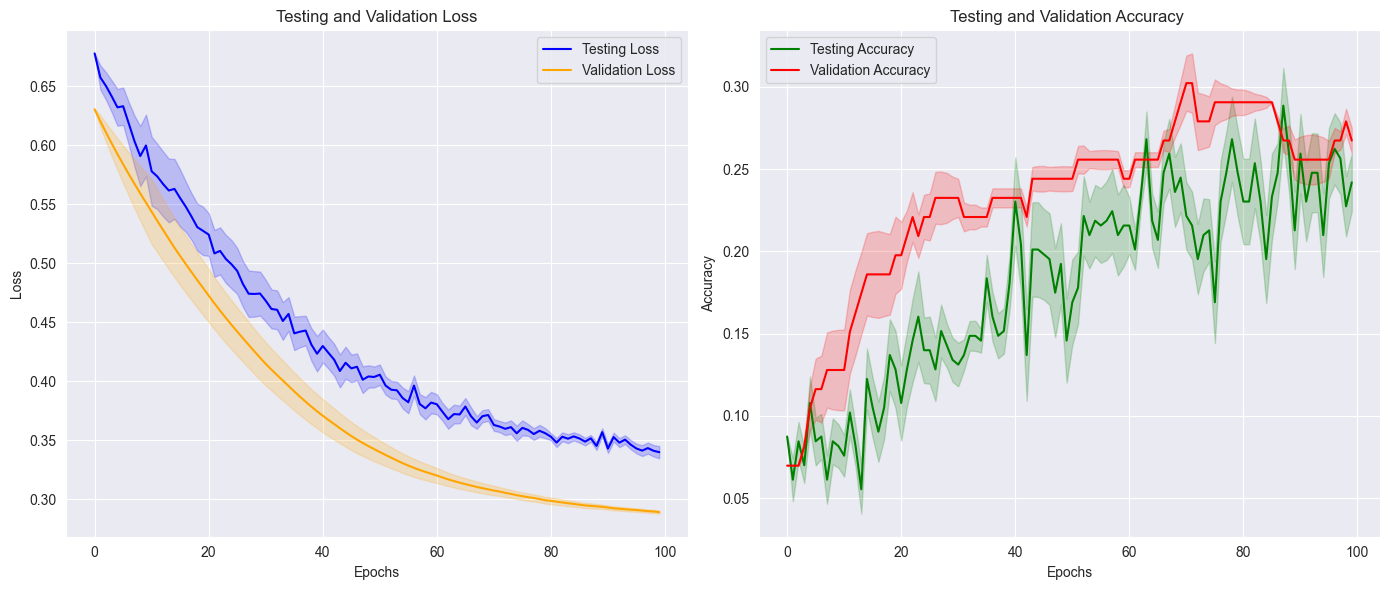

In [11]:

# Assuming you have a Keras 'history' object from training your model
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Convert lists into NumPy arrays for easier manipulation
loss = np.array(loss)
val_loss = np.array(val_loss)
accuracy = np.array(accuracy)
val_accuracy = np.array(val_accuracy)

# Define a window size for rolling calculations (you can adjust this value)
window_size = 10

# Calculate rolling standard deviation for each metric
rolling_std_loss = np.array([np.std(loss[max(0, i - window_size):i+1]) for i in range(len(loss))])
rolling_std_val_loss = np.array([np.std(val_loss[max(0, i - window_size):i+1]) for i in range(len(val_loss))])
rolling_std_accuracy = np.array([np.std(accuracy[max(0, i - window_size):i+1]) for i in range(len(accuracy))])
rolling_std_val_accuracy = np.array([np.std(val_accuracy[max(0, i - window_size):i+1]) for i in range(len(val_accuracy))])

# Plotting Loss vs. Epochs with Error Bars
plt.figure(figsize=(14, 6))

# Plot Loss with Error Bars
plt.subplot(1, 2, 1)
plt.plot(loss, label='Testing Loss', color='blue')
plt.fill_between(range(len(loss)), loss - rolling_std_loss, loss + rolling_std_loss, color='blue', alpha=0.2)
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.fill_between(range(len(val_loss)), val_loss - rolling_std_val_loss, val_loss + rolling_std_val_loss, color='orange', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing and Validation Loss')
plt.legend()

# Plot Accuracy with Error Bars
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Testing Accuracy', color='green')
plt.fill_between(range(len(accuracy)), accuracy - rolling_std_accuracy, accuracy + rolling_std_accuracy, color='green', alpha=0.2)
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.fill_between(range(len(val_accuracy)), val_accuracy - rolling_std_val_accuracy, val_accuracy + rolling_std_val_accuracy, color='red', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Testing and Validation Accuracy ')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/200


D:\prediction flood drivers\Predicting-Flood-Drivers\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.1324 - loss: 4.6194 - val_accuracy: 0.2674 - val_loss: 3.9879 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3430 - loss: 3.8599 - val_accuracy: 0.3953 - val_loss: 3.5683 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3790 - loss: 3.6207 - val_accuracy: 0.4535 - val_loss: 3.5173 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2929 - loss: 3.7952 - val_accuracy: 0.4651 - val_loss: 3.7816 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3287 - loss: 4.0771 - val_accuracy: 0.3837 - val_loss: 4.0354 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3281 - loss: 4.4862 - val_accuracy: 0.3953 - val_loss: 4.6712 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3594 - loss: 5.1106 - val_accuracy

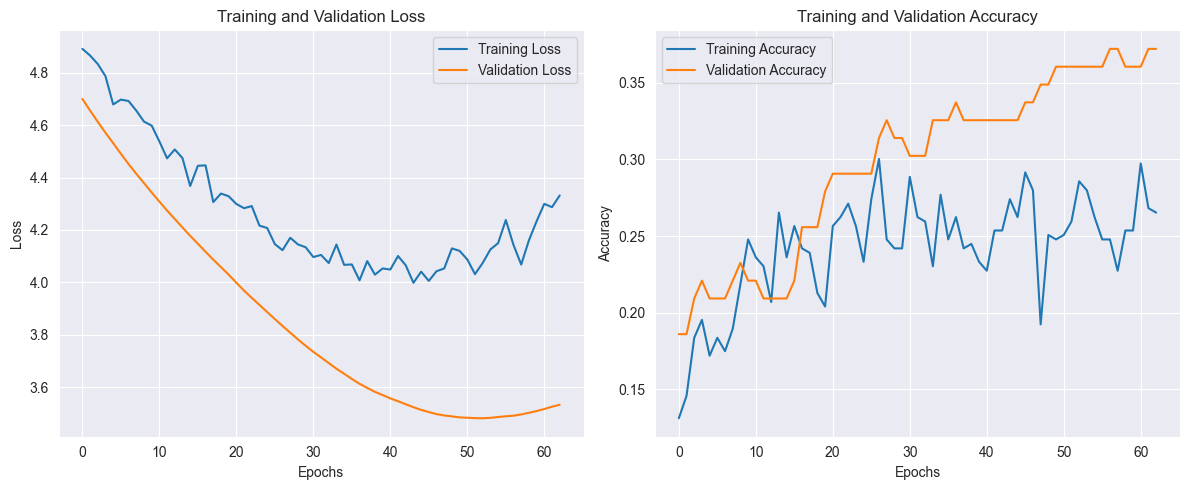

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Assuming you have already saved the top 13 features in 'top_13_features_final'
# Extract the features and labels
top_13_features = [
    'TotalPrecip2', 'SnowIcePercent', 'PerimeterAreaRatio', 'HydrometricCount',
    'UrbanPercent', 'WetlandPercent', 'MaxTWI', 'MaxTPI', 'ShrubsGrassPercent',
    'BarrenPercent', 'ForestedPercent', 'BifurcationRatio', 'PermWaterPercent'
]
X = main_df[features_columns].values
y = main_df[label_columns].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the neural network model with more complexity and other improvements
model = Sequential()

# Input layer and first hidden layer with Leaky ReLU and Batch Normalization
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Second hidden layer with more neurons and Batch Normalization
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(32, activation='relu'))

# Output layer with sigmoid activation (for multi-label classification)
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks to help improve training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with increased epochs and more callbacks
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

# Plotting Loss vs. Epochs
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
from tensorflow.keras.regularizers import l1_l2

# Create the neural network model with L1/L2 Regularization and Dropout
model = Sequential()

# Input layer and first hidden layer with L2 regularization, Batch Normalization, and Dropout
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu',
                kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))  # L1 and L2 regularization
model.add(BatchNormalization())
model.add(Dropout(0.25))  # Adjusted Dropout

# Second hidden layer with L2 regularization, Batch Normalization, and Dropout
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.25))  # Adjusted Dropout

# Third hidden layer with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer with sigmoid activation (for multi-label classification)
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks to help improve training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model with increased epochs and more callbacks
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")


D:\prediction flood drivers\Predicting-Flood-Drivers\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1111 - loss: 6.0684 - val_accuracy: 0.1279 - val_loss: 4.8161 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1088 - loss: 5.7000 - val_accuracy: 0.2558 - val_loss: 4.6419 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1719 - loss: 5.4000 - val_accuracy: 0.2791 - val_loss: 4.4828 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2021 - loss: 5.1719 - val_accuracy: 0.3140 - val_loss: 4.3264 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2268 - loss: 4.9912 - val_accuracy: 0.3837 - val_loss: 4.2010 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2623 - loss: 4.7223 - val_accuracy: 0.4302 - val_loss: 4.0971 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2745 - loss: 4.6561 - 

In [20]:
# Check predictions on a small batch
predictions = model.predict(X_train[:5])
print("Predictions:\n", predictions)

# Check if each prediction sums to 1
print("Sum of Predictions:\n", np.sum(predictions, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predictions:
 [[0.9367066  0.27367386 0.38427493 0.6918378  0.8644778  0.5023699
  0.27267134 0.76438636 0.23935927 0.6029856  0.481301   0.40355173]
 [0.91696256 0.39958683 0.3753842  0.54985285 0.89230984 0.52908134
  0.370781   0.73429394 0.2921349  0.54465777 0.38572857 0.41453812]
 [0.73302126 0.14309356 0.2742729  0.92821145 0.7226501  0.43734947
  0.29375637 0.64565295 0.5122601  0.4821927  0.50416255 0.45695716]
 [0.93345517 0.42527306 0.6744137  0.50977397 0.7185283  0.54295
  0.27324498 0.7014421  0.3698709  0.6338667  0.39575928 0.4779535 ]
 [0.93163705 0.36004898 0.4819011  0.5767323  0.8870058  0.5729041
  0.25779536 0.7856611  0.31105646 0.68671227 0.35444745 0.35413522]]
Sum of Predictions:
 [6.417596  6.405311  6.1335807 6.656532  6.560037 ]


In [21]:
# Verify labels are valid
print("First 5 labels:\n", y[:5])

# Ensure labels sum to 1
print("Sum of Labels:\n", np.sum(y, axis=1))


First 5 labels:
 [[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Sum of Labels:
 [2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    2.    1.667 2.
 2.    2.    2.    2.    2.    2.    2.    2.    2.    1.    2.    2.
 2.    2.    2.    2.    2.    2.    1.    1.947 2.    2.    1.96  1.818
 2.    1.818 1.948 2.    1.857 2.    2.    2.    2.    2.    1.667 1.889
 2.    2.    2.    1.98  2.    2.    2.    1.8   2.    2.    2.    1.999
 1.899 1.618 2.    1.75  2.001 2.    2.    2.    2.    2.    2.    2.
 2.    2.    1.972 2.    2.    2.    2.    2.    2.    2.    2.    2.
 1.922 2.    2.    2.    2.    2.    2.    2.    1.834 2.001 2

In [22]:
# Compare predictions and labels for a sample
sample_idx = 0  # Change this index to inspect different samples
print("Predictions for sample:", predictions[sample_idx])
print("Labels for sample:", y[sample_idx])


Predictions for sample: [0.9367066  0.27367386 0.38427493 0.6918378  0.8644778  0.5023699
 0.27267134 0.76438636 0.23935927 0.6029856  0.481301   0.40355173]
Labels for sample: [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
# Create a dummy training step to inspect gradients
import tensorflow as tf

with tf.GradientTape() as tape:
    y_pred = model(X_train[:1])  # Predict for one sample
    loss = tf.keras.losses.CategoricalCrossentropy()(y[:1], y_pred)

# Get gradients
gradients = tape.gradient(loss, model.trainable_variables)

# Print gradient norms
for i, grad in enumerate(gradients):
    print(f"Gradient norm for variable {i}: {tf.norm(grad).numpy()}")


Gradient norm for variable 0: 9.855656623840332
Gradient norm for variable 1: 1.89203941822052
Gradient norm for variable 2: 0.7032307982444763
Gradient norm for variable 3: 1.4153146743774414
Gradient norm for variable 4: 7.617379188537598
Gradient norm for variable 5: 1.1945688724517822
Gradient norm for variable 6: 0.7493032217025757
Gradient norm for variable 7: 1.4994654655456543
Gradient norm for variable 8: 4.584513187408447
Gradient norm for variable 9: 1.2013517618179321
Gradient norm for variable 10: 0.7532030940055847
Gradient norm for variable 11: 1.6989409923553467
Gradient norm for variable 12: 2.9458532333374023
Gradient norm for variable 13: 0.980942964553833


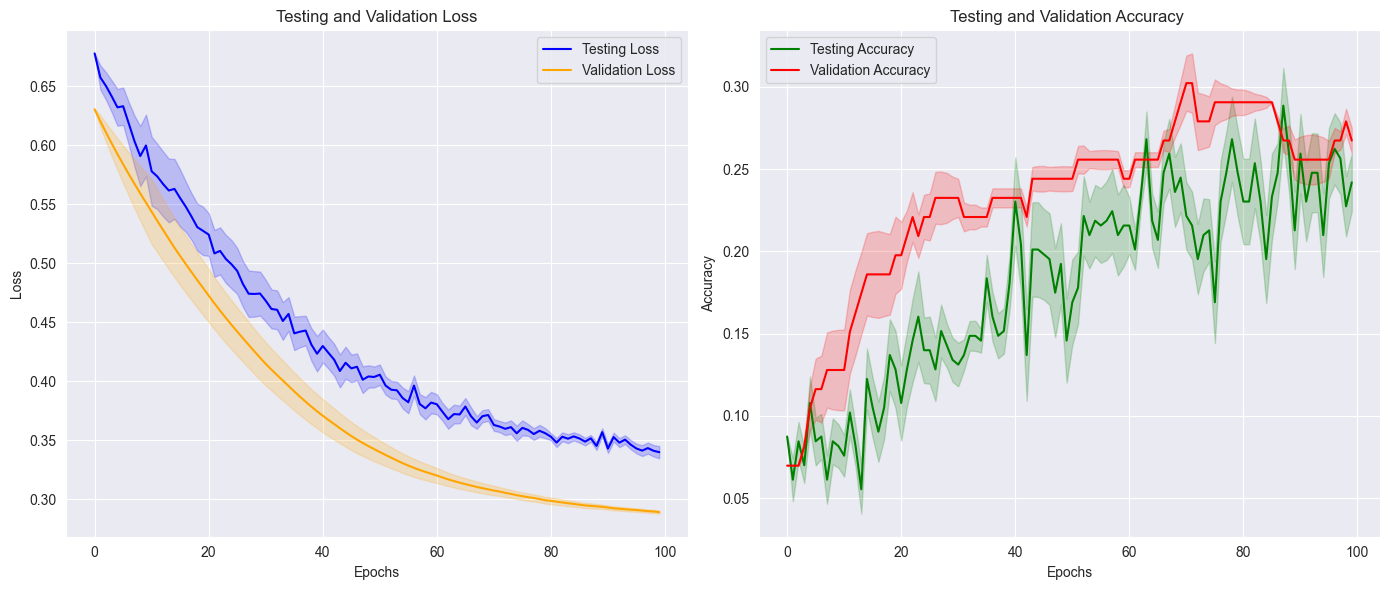

In [10]:

# Assuming you have a Keras 'history' object from training your model
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Convert lists into NumPy arrays for easier manipulation
loss = np.array(loss)
val_loss = np.array(val_loss)
accuracy = np.array(accuracy)
val_accuracy = np.array(val_accuracy)

# Define a window size for rolling calculations (you can adjust this value)
window_size = 10

# Calculate rolling standard deviation for each metric
rolling_std_loss = np.array([np.std(loss[max(0, i - window_size):i+1]) for i in range(len(loss))])
rolling_std_val_loss = np.array([np.std(val_loss[max(0, i - window_size):i+1]) for i in range(len(val_loss))])
rolling_std_accuracy = np.array([np.std(accuracy[max(0, i - window_size):i+1]) for i in range(len(accuracy))])
rolling_std_val_accuracy = np.array([np.std(val_accuracy[max(0, i - window_size):i+1]) for i in range(len(val_accuracy))])

# Plotting Loss vs. Epochs with Error Bars
plt.figure(figsize=(14, 6))

# Plot Loss with Error Bars
plt.subplot(1, 2, 1)
plt.plot(loss, label='Testing Loss', color='blue')
plt.fill_between(range(len(loss)), loss - rolling_std_loss, loss + rolling_std_loss, color='blue', alpha=0.2)
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.fill_between(range(len(val_loss)), val_loss - rolling_std_val_loss, val_loss + rolling_std_val_loss, color='orange', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Testing and Validation Loss')
plt.legend()

# Plot Accuracy with Error Bars
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Testing Accuracy', color='green')
plt.fill_between(range(len(accuracy)), accuracy - rolling_std_accuracy, accuracy + rolling_std_accuracy, color='green', alpha=0.2)
plt.plot(val_accuracy, label='Validation Accuracy', color='red')
plt.fill_between(range(len(val_accuracy)), val_accuracy - rolling_std_val_accuracy, val_accuracy + rolling_std_val_accuracy, color='red', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Testing and Validation Accuracy ')
plt.legend()

plt.tight_layout()
plt.show()
